In [15]:
import qcelemental as qcel
import numpy as np
from sympy import *
from scipy import integrate as integracion_num
import matplotlib.pyplot as plt

c = qcel.constants.c
h = qcel.constants.h
me= qcel.constants.me
pi = np.pi
avog = qcel.constants.get("Avogadro constant")
J2kJmol = avog/1000

ModuleNotFoundError: No module named 'sympy'

### Ejercicio 1:

Demuestre que la energı́a de la función de onda:

\begin{equation*}
        \psi_{100}(r)\alpha = 1s(r)\alpha
\end{equation*}

Es función propia del Hamiltoniano del átomo de hidrógeno.

**Solución:** 

Ya sabemos que la función $\psi_{100}(r)$ es función propio del operador Hamiltoniano. Tal que:

\begin{equation*}
        \hat{H}\psi_{100}(r) = E_n\psi_{100}(r)
\end{equation*}

Entonces la consideración más importante para este ejercicio es que el operador Hamiltoniano no relativista no opera (no modifica) las funciones de spin. Si lo hace por ejemplo el Hamiltoniano relativista en la ecuación de Dirac:

\begin{equation*}
\left(\beta mc^2 + c \sum_{n \mathop =1}^{3}\alpha_n p_n\right) \psi (x,t) = i \hbar \frac{\partial\psi(x,t) }{\partial t}
\end{equation*}

Donde $\beta$ es un operador de spin.

Teniendo eso en consideración podemos escribir:

\begin{equation*}
        \hat{H}\psi_{100}(r)\alpha = \alpha\hat{H}\psi_{100}(r) = E_n\psi_{100}(r)\alpha
\end{equation*}

Por lo tanto agregar una función de spin a la función de onda no afecta la energía pero si afecta el grado de degeneración del nivel de energía que aumenta al doble. 





### Ejercicio 2:

Demuestre que la función de onda aproximada para el átomo de Helio:

\begin{equation*}
        \psi_{100}(r) = 1s(1)1s(2)
\end{equation*}

Es función propia del Hamiltoniano:

\begin{equation*}
        \hat{H} = \hat{H_1} + \hat{H_2}
\end{equation*}

Donde:

\begin{equation*}
        \hat{H_1} = -\frac{\hbar^2}{2m_e}\nabla_1^2 - \frac{Ze'^2}{r_1} \qquad \hat{H_2} = -\frac{\hbar^2}{2m_e}\nabla_1^2 - \frac{Ze'^2}{r_2}
\end{equation*}



**Solución:**

Para demostrar que una función es función propia del operador, debemos aplicar el operador a la función y ver si recuperamos la misma función más el operador. Una cosa importante a tener en cuenta para este ejercicio es que sabemos que sabemos que las funciones por si solas son funciones propias del los operadores $\hat{H_1} y \hat{H_2}$:

\begin{align*}
       \hat{H_1}1s(1) = E_1 1s(1) \\
       \hat{H_2}1s(2) = E_2 1s(2)
\end{align*}

Porque los operadores $\hat{H_1} y \hat{H_2}$ son  hamiltonianos  del átomo de hidrógeno. Por lo tanto podemos proceder a la demostración:

\begin{align*}
   \hat{H_1} + \hat{H_2}(1s(1)1s(2)) &= \hat{H_1}1s(1)1s(2)) + \hat{H_2}(1s(1)1s(2))\\
                                     &= 1s(2)\hat{H_1}1s(1)) + 1s(1)\hat{H_2}(1s(2))\\
                                     &= 1s(2)E_1 1s(1)) + 1s(1)E_1 1s(2))\\ 
                                     &= 2E_1 (1s(1)1s(2))
\end{align*}

Por lo tanto la función de onda propuesta es función propia del Hamiltoniano aproximado que ignora las interacciones electrón-electrón. Y el valor propio es la suma de las energía de cada función. En este modelo los electrones no saben de la existencia del otro electrón y se comportan como si están en un átomo hidrogenoide con Z=2. Por último notese que los Hamiltonianos solamente operan sobre las funciones de sus coordenadas, en otras palabras el hamiltoniano $\hat{H_1}$ solamente opera sobre las cooredenadas en la función 1s(1) y la función 1s(2) no se altera (La trata como una constante). 


###  Ejercicio 4

Utilice la función de prueba:

\begin{equation*}
        \phi = x(l-x)
\end{equation*}

Para encontrar una energía aproximada de la partícula en una caja  1-D a través de la integral variacional:

\begin{equation*}
W = \frac{\int\phi^* \hat{H} \phi d\tau}{\int\phi^*\phi d\tau}
\end{equation*}

**Solución:**

Recordemos que las posibles funciones de estado de una particula en la caja 1D se obtienen al resolver la ecuación de Schrördinger:

$$
\begin{align}
\hat{H}\Psi(x) = E\Psi(x)\\
-\frac{\hbar²}{2m}\frac{d^2}{dx^2}\Psi(x) = E\Psi(X)
\end{align}
$$

Esta es una ecuación diferencial de segundo orden, para la cual es posible encontrar 
soluciones exactas, para una partícula en una caja de largo $L$ y masa $m$.


$$
\begin{align}
\Psi(x) = \sqrt{\frac{2}{L}}\sin{\frac{n\pi x}{L}} \qquad E_n = \frac{n^2h}{8mL^2}
\end{align}
$$

En este ejercicio queremos evaluarl la factibilidad de utilizar una función de prueba y evaluar si es factible utilizarla para obtener una energía aproximada de la partícula en una caja a través de la integral variacional:

Primero visualizemos ambas funciones, la exacta y aproximada para ver si son similares.

In [23]:
def psi(x,l):
    return np.sqrt(2/l)*np.sin(np.pi*x/l)

def phi(x,l):
    return x*(l - x)

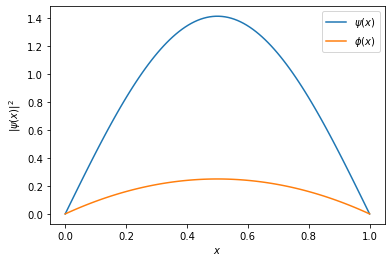

In [24]:
L = 1.0
x = np.linspace(0,L,100)
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
#for i in range(0,5):
plt.plot(x,psi(x,L), label=r'$\psi(x)$');
plt.plot(x,phi(x,L), label=r'$\phi(x)$');
plt.legend();


Como podemos ver las funciones son similares en forma pero tienen una altura distinta
porque la función $\phi(x)$ no está normalizada. Procedamos entonces a calcular la integral variacional:

\begin{align}
\int\phi^* \hat{H} \phi d\tau &= \int_0^l x(l-x) \left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}\right)x(l-x)dx \\
 &= -\frac{\hbar^2}{2m}\int_0^l (xl-x^2) \left(\frac{d^2}{dx^2}\right) (xl-x^2)dx \\
&= -\frac{\hbar^2}{2m}\int_0^l (xl-x^2) 2dx \\
&= -\frac{\hbar^2}{m}\left(l\int_0^l x dx - \int_0^l x^2 dx\right) \\
\end{align}

Considerando que:

\begin{align}
\int_a^b x^ndx = \frac{x^{n+1}}{n+1}\bigg\rvert_a^b
\end{align}

\begin{align}
\int\phi^* \hat{H} \phi d\tau 
&= -\frac{\hbar^2}{m}\left(l\frac{x^2}{2}\bigg\rvert_0^l - \frac{x^3}{3}\bigg\rvert_0^l \right) \\
&= -\frac{\hbar^2}{m}\left(\frac{l^3}{2} - \frac{l^3}{3} \right) \\
&=\frac{\hbar^2 l^3}{6m}
\end{align}

La integral del denominador es:

\begin{align}
\int\phi^* \phi d\tau &=  \int_0^l x^2(l-x)^2 dx \\ 
                       &=  \int_0^l x^2l^2 dx -  \int_0^l 2lx^3 dx  + \int_0^l x^4 dx \\ 
                      &= \frac{l^5}{30}
\end{align}

Juntando ambas integrales obtenemos el siguiente valor de la integral variacional:

\begin{align}
W &= \frac{\int\phi^* \hat{H} \phi d\tau}{\int\phi^* \phi d\tau} \\
  &= \frac{\hbar^2 l^3 / 6m}{l^5/30} = \frac{5h^2}{4\pi ml^2}
  &= 0.1266515\frac{h^2}{ml^2}
\end{align}

Comparando con la energía exacta de la partícula en una caja 1-D de largo $l$ obtenemos que:

$$ W > E_1 $$

Justamente lo que predicie el teorema variacional. Además el porcentaje de error es muy pequeño ya que la energía exacta es:

\begin{align}
 E_1 = \frac{h^2}{8ml^2} = 0.125 \frac{h^2}{ml}
\end{align}

Solamente 1.3% de error! Finalmente visualicemos las ambas funciones normalizadas considerando que la condición de normalización:

\begin{align}
 \int_0^l N\phi^* N\phi dx = 1 \\
 N^2\int_0^l \phi^* \phi dx = 1 \\
 N = \sqrt{\frac{1}{\int_0^l \phi^* \phi dx}} \\
   = \sqrt{\frac{1}{l^5/30}} = \sqrt{\frac{30}{l^5}}
\end{align}

Por lo tanto la función de prueba normalizada es:

\begin{equation*}
        \phi =  \sqrt{\frac{30}{l^5}}x(l-x)
\end{equation*}

Visualicemos nuevamente ambas funciones de onda:



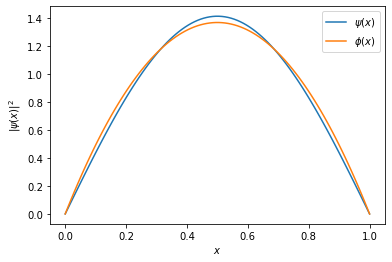

In [26]:
def phi_N(x,l):
    return np.sqrt(30./l**5.) * x * (l - x)

L = 1.0
x = np.linspace(0,L,100)
plt.ylabel(r"$\|\psi(x)|^2$")
plt.xlabel(r"$x$")
#for i in range(0,5):
plt.plot(x,psi(x,L), label=r'$\psi(x)$');
plt.plot(x,phi_N(x,L), label=r'$\phi(x)$');
plt.legend();

Podemos ver que la coincidencia entre ambas funciones, la exacta y la función de prueba es casi perfecta! Por lo tanto en el método variacional es importante encontrar una función de prueba que sea lo más similar posible a al sistema exacto. Sin embargo la mayoría de las veces no se conoce la función de onda exacta y por lo tanto uno debe encontrar funciones de onda aproxiamadas que son exacata para una sistema similar al cual se quiere resolver por ejemplo la función de onda aproximada del ejercicio 1, es exactat para un átomo de helio donde los electrones no interactuan. Entonces ese es un buen punto de partida para ir mejorando la función de onda incluyendo paramentros variacionales. 

### Ejercicio 4:

Escriba todas las integrales que se deben calcular al utilizar el método variacional con la función de onda aproximada:
\begin{equation*}
        \psi(r_1,r_2) = \pi^{-1}\frac{\alpha}{a_0}e^{-Zr_1/a_0}e^{-Zr_2/a_0}
\end{equation*}
La integral variacional es:
\begin{equation*}
        W = \int_0^\infty\int_0^{\pi}\int_0^{2\pi}\int_0^\infty\int_0^{\pi}\int_0^{2\pi}\psi(r_1,r_2)\hat{H}\psi(r_1,r_2)r_1^2r_2^2dr_1dr_2sen(\theta_1)sen(\theta_2)d\theta_1d\theta_2 d\phi_1 d\phi_2
\end{equation*}


### Ejercicio 9:

Las reglas para obtener la constante de apantallamiento del i-ésimo electrón son las siguientes:\\

A) Escribir la configuración electrónica de un átomo por capas:
        (1s)(2s2p)(3s3p)(4s4p)(4d)(4f)(5s5p)... \\

B) Identificar el grupo del electrón i-ésimo y obtener $\sigma$, como la suma de las siguientes
contribuciones:

- 0.0 por cada electrón a la derecha
- 0.35 por cada electrón adicional en el mismo grupo que se encuentra el i-ésimo
- si $i$ es un electrón $s$ o $p$, 0.85 por cada electrón en los grupos con $n = n_i - 1$ por todos los electrones más a la izquierda.
-  si $i$ es un electrón $d$ o $f$, 1.00 por cada electrón en los grupos con $n = n_i - 1$.  1.00 por todos los electrones más a la izquierda.

Calcule la constante de apantallamiento de los siguientes átomos: O(2s), Cl(3p), Fe(3d), Ge(3s)


**Solución:**

El el tratamiento exacto del átomo de helio, los electrones son atraidos por un nucleo de carga nuclear Z=2 y al mismo tiempo se repelen mutuamente por sus cargas iguales negativas. Podemos perservar el modelo de electrones independiente sustiuyendo la repulsión interelectronica por una atracción menor del nucleó positivo. En el caso del átomo de helio esto se traduce a una atracción nuclear con una carga nuclear efectiva:

$$ Z_eff = Z -\sigma $$

donde $\sigma$ es una constante de apantallamiento nuclear. Esta constante depende del orbital en al cual se encuentra el electrón y naturalmente será mayor para electrones en el orbital 2s que electrones en el orbital 1s.



In [76]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
%matplotlib inline
import scipy


a0=1.

def R_sq(r,n,l):
    R = -np.math.factorial(n+l)*np.sqrt(np.math.factorial(n-l-1)/(2*n*(np.math.factorial(n+l))**3)) * (2/(a0*n))**(l+3/2) * r**l * np.exp(-r/(n*a0)) * scipy.special.genlaguerre(n-l-1,2*l+1)(2*r/(n*a0))
    return R**2

def disRad(r,n,l):
    return R_sq(r,n,l)*(r**2)

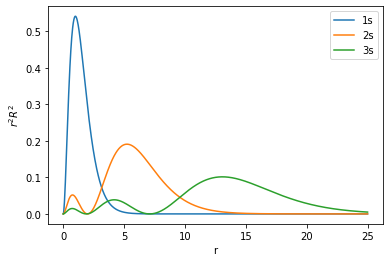

In [74]:
r1 = np.linspace(0,25,1000)



plt.xlabel("r")
plt.ylabel("$r^2R^2$")
plt.plot(r1, disRad(r1,1,0), label='1s')
plt.plot(r1, disRad(r1,2,0), label='2s')
plt.plot(r1, disRad(r1,3,0), label='3s')
plt.legend();




Pueden ver que los máximos en la distribución radial se encuentran en posiciones distintas, con el máximo de la función 3s estando mucho más alejado que el de la función 1s. Esto significa que el apantallamiento de los electrones 1s a los 3s va ser muy eficiente. 

En tanto si visualizamos los orbitales 2s y 2p:

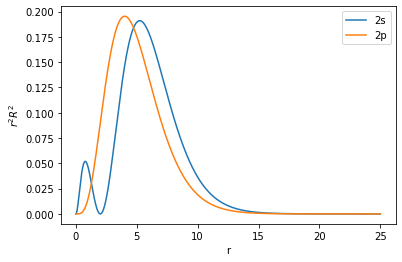

In [75]:
plt.xlabel("r")
plt.ylabel("$r^2R^2$")
plt.plot(r1, disRad(r1,2,0), label='2s')
plt.plot(r1, disRad(r1,2,1), label='2p')
plt.legend();


Vemos que el máximo en la distribción coincide por lo que el apantallamiento no es muy eficiente.
Basado en estas observaciones acerca de las distribuciones radiales de los electrones, Slater 
propuso una serie de reglas empíricas que permiten obtener una constante de apantallamiento 
aproximada sin la necesidad de hacer un calculo con el método variacional. Calculemos entonces la constante de apantallamiento de un electron 2s del Oxígeno:

Primero debemos escribir la configuración electrónica por capas:

$$ O: 1s^22s^2 2p^4 = (1s)^2 (2s2p)^6$$

Calculamos entonces el apantallamiento de los electrones en la misma capa. Son 6 los electrones en la capa dos por lo tanto debemos considerar el apantallamiento de 5 electrones:

$$ \sigma = 5*0.35 $$

Despues debemos considerar el apantallamiento de  los electrones 1s. Estos caen en la categoria de capas interirores por lo cual se aplica la tercera regla y se le asigna un valor de 0.85 a cada uno. Por lo tanto la constante de apantallamiento queda como:

$$ \sigma = 5*0.35 + 2*0.85 = 3.45$$

Por lo tanto la carga nuclear efectiva de este átomo es:

$$ Z_{eff} = 8 - 3.45 = 4.55 $$

### Ejercicio 14:

La primera energia de ionizacion de Li en su estado fundamental es 519 kJ/mol.  Calcule el valor de $Z_{eff}.

**Solucion:**:  Sabembos que para átomos polielectrónicos podemos aproximar la energía de cada orbital como:

$$ \epsilon  = -\frac{Z_{eff}^2}{n^2} (13.6 \text{ eV}) $$

Además como vimos en clases, el potencial de ionización es la energía necesaria para extraer el electrón de más alta energía. En el caso del átomo de Li, de configuración electrónica 1s²2s¹ el electrón de más alta energía corresponde a un estado tipo 2s por lo tanto el potencial de ionziación esta dada por la energía de ese electrón con n = 2 que es:

$$ IP = -\epsilon  = \frac{Z_{eff}^2}{4}(13.6 \text{ eV}) $$ 

El enunciado nos indica que el potencial de ionización es 519 kJ/mol. Por lo tanto tenemos que:

$$ 519 \text{ kJ/mol} =  \frac{Z_{eff}^2}{4} $$

$$ Z_eff = -\frac{519 \text{ kJ/mol} \text{ x } (6.626 x 10^{23})^{-1} \text{ mol} \text{ x } 6.241 x 10^{21} \text{ ev/KJ}}{4} $$



In [14]:
Zeff =  519 * qcel.constants.conversion_factor("kJ/mol" , "eV")/4
print('El Zeff del atomo de Litio es: {} '.format(np.round(Zeff,2)))

El Zeff del atomo de Litio es: 1.34 
